# Embedding Method

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('/Users/zhanfengzhao/Desktop/final_dataset.csv')
df.head()

,Unnamed: 0,review_id,text,stars
0,48469,Nh3b72ycaDuPp9JzKHUt5A,I love this store. Ive been shopping here for ...,5.0
1,263807,j-4-gLG0VkXGnS1zgeQfew,I have ate a lot of burgers in my time. This i...,5.0
2,181423,bs2CF6EJI9jK6KnTXPKyNw,I spent 3 months searching for a dog walker wh...,5.0
3,58676,nUCE_Nqidcxs-zCUvz0aJw,Just stayed here for a second time and overall...,4.0
4,284908,OrBX9I8-QxIvaHG4euw4cQ,For right now I would have to rate this specif...,1.0


In [3]:
# See Transformers from Hugging Face: https://huggingface.co/transformers/ 
# Simple Transformers: https://github.com/ThilinaRajapakse/simpletransformers

!pip install gensim
#!pip install transformers

  Using cached gensim-3.8.3-cp37-cp37m-macosx_10_9_x86_64.whl (24.2 MB)
     |████████████████████████████████| 117 kB 5.2 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-4.0.1-py3-none-any.whl size=108247 sha256=178c4fe0cf342350c1d770e7f9884f6bee8478d1e636dd1578ba195a38eafefe
  Stored in directory: /Users/zhanfengzhao/Library/Caches/pip/wheels/34/3d/14/f19c01a19c9201cdb6a76b049904d5226912569be919ad1eae
Successfully built smart-open


In [4]:
import json
from sklearn import feature_extraction, feature_selection, metrics
from sklearn import model_selection, naive_bayes, pipeline, manifold, preprocessing
import gensim
import gensim.downloader as gensim_api
#from tensorflow.keras import models, layers, preprocessing as kprocessing
#from tensorflow.keras import backend as K
#from tensorflow.keras.utils import plot_model
#import transformers

In [5]:
import re
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
stopwords = nltk.corpus.stopwords.words("english")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhanfengzhao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhanfengzhao/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [6]:
# Use texthero as an alternative text cleaner

def removeNumbersStr(s):
    for c in range(10):
        n = str(c)
        s = s.replace(n," ")
    return s

def cleanText(text, stem=False, lemm=True, stop=True):
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())  # remove stuff
    text = removeNumbersStr(text)
    text = text.split()  # tokenize
    if stop is not None:  # remove stopwords
        text = [word for word in text if word not in stopwords]
    if stem == True:  # stemming
        ps = nltk.stem.porter.PorterStemmer()
        text = [ps.stem(word) for word in text]
    if lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text]
    text = " ".join(text) 
    return text

In [7]:
df["cleanTxt"] = [cleanText(df.text[j]) for j in range(len(df.stars))]
print(df.shape)
df.head()

(106717, 5)


,Unnamed: 0,review_id,text,stars,cleanTxt
0,48469,Nh3b72ycaDuPp9JzKHUt5A,I love this store. Ive been shopping here for ...,5.0,love store ive shopping year daughter amazing ...
1,263807,j-4-gLG0VkXGnS1zgeQfew,I have ate a lot of burgers in my time. This i...,5.0,ate lot burger time best burger ever aaa burge...
2,181423,bs2CF6EJI9jK6KnTXPKyNw,I spent 3 months searching for a dog walker wh...,5.0,spent month searching dog walker first moved t...
3,58676,nUCE_Nqidcxs-zCUvz0aJw,Just stayed here for a second time and overall...,4.0,stayed second time overall good two night room...
4,284908,OrBX9I8-QxIvaHG4euw4cQ,For right now I would have to rate this specif...,1.0,right would rate specific store one star drive...


# Model - Binary(mean)

## 1.Using Embeddings

In [8]:
mean=df.stars.mean()

In [9]:
mean

3.5579534273532305

In [10]:
def toBinary(x):
    if x <= mean:
        return 0
    else:
        return 1

In [11]:
df['sentiment'] = df.stars.apply(toBinary)

In [12]:
df.head(5)

,Unnamed: 0,review_id,text,stars,cleanTxt,sentiment
0,48469,Nh3b72ycaDuPp9JzKHUt5A,I love this store. Ive been shopping here for ...,5.0,love store ive shopping year daughter amazing ...,1
1,263807,j-4-gLG0VkXGnS1zgeQfew,I have ate a lot of burgers in my time. This i...,5.0,ate lot burger time best burger ever aaa burge...,1
2,181423,bs2CF6EJI9jK6KnTXPKyNw,I spent 3 months searching for a dog walker wh...,5.0,spent month searching dog walker first moved t...,1
3,58676,nUCE_Nqidcxs-zCUvz0aJw,Just stayed here for a second time and overall...,4.0,stayed second time overall good two night room...,1
4,284908,OrBX9I8-QxIvaHG4euw4cQ,For right now I would have to rate this specif...,1.0,right would rate specific store one star drive...,0


In [13]:
df.sentiment.value_counts()

1    66584
0    40133
Name: sentiment, dtype: int64

In [14]:
df_train, df_test = model_selection.train_test_split(df, test_size=0.2)
y_train = df_train["sentiment"].values 
y_test = df_test["sentiment"].values

In [15]:
# Create embeddings from data itself
corpus = df_train["cleanTxt"]

## create list of lists of unigrams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, len(lst_words), 1)] 
    lst_corpus.append(lst_grams)

In [16]:
## detect bigrams and trigrams
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, delimiter=" ".encode(), min_count=5, threshold=10) 
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus],
                                                  delimiter=" ".encode(), min_count=5, threshold=10) 
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

## Run this for bigrams (and trigrams, if desired)
lst_corpus = list(bigrams_detector[lst_corpus]) 
# lst_corpus = list(trigrams_detector[lst_corpus])

print("Size of training corpus:", len(lst_corpus))
print("size of each element:", len(lst_corpus[0]), len(lst_corpus[1])) # print first two docs length
# lst_corpus

Size of training corpus: 85373
size of each element: 92 42


In [17]:
vector_size = 100
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, size=vector_size, window=8, min_count=1, sg=1, iter=30)

### reduce dimension

In [18]:
# Visualize word context
word = "profit"
vector_size = len(nlp[word])
word_vec = nlp[word] # to see a sample word vector
print(nlp.most_similar(word, topn=5))
## word embedding
tot_words = [word] + [j[0] for j in nlp.most_similar(word, topn=25)]
X = nlp[tot_words]
X.shape

[('uniteds', 0.6138536334037781), ('groupssavers', 0.571625292301178), ('iodas', 0.5676900148391724), ('moneymaking', 0.564327597618103), ('cept', 0.559897780418396)]


/Users/zhanfengzhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhanfengzhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/Users/zhanfengzhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """
/Users/zhanfengzhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
/Users/zhanfeng

(26, 100)

In [19]:
## Reduce dimensionality from vector_size to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca') 
X = pca.fit_transform(X)
print(X.shape)

## make X into dataframe
df_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"]) 
df_["input"] = 0
df_["input"].iloc[0:1] = 1


(26, 3)


/Users/zhanfengzhao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


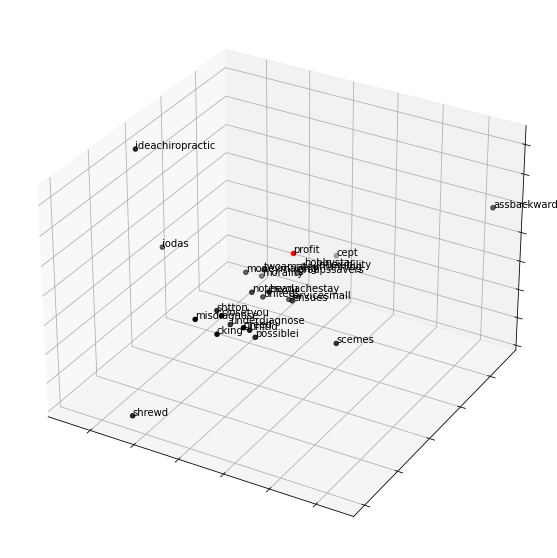

In [20]:
## TSNE plot 3d
from mpl_toolkits.mplot3d import Axes3D 
fig = figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(df_[df_["input"]==0]['x'],
df_[df_["input"]==0]['y'],
df_[df_["input"]==0]['z'], c="black") 
ax.scatter(df_[df_["input"]==1]['x'],
df_[df_["input"]==1]['y'],
df_[df_["input"]==1]['z'], c="red") 
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[],
yticklabels=[], zticklabels=[])
for label, row in df_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

### neural network

In [21]:
!pip install transformers

     |████████████████████████████████| 1.4 MB 6.0 MB/s eta 0:00:01
  Using cached sacremoses-0.0.43.tar.gz (883 kB)
     |████████████████████████████████| 2.0 MB 18.8 MB/s eta 0:00:01
  Created wheel for sacremoses: filename=sacremoses-0.0.43-py3-none-any.whl size=893259 sha256=67890e1927cf2a05be2905b5d717e9833bcfc7009357abd088c0fdbcc6c12d9b
  Stored in directory: /Users/zhanfengzhao/Library/Caches/pip/wheels/69/09/d1/bf058f7d6fa0ecba2ce7c66be3b8d012beb4bf61a6e0c101c0
Successfully built sacremoses


In [22]:
import transformers

Neither PyTorch nor TensorFlow >= 2.0 have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [23]:
!pip install tensorflow

     |████████████████████████████████| 165.1 MB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 20.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 15.1 MB/s eta 0:00:01
     |████████████████████████████████| 15.1 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 14.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 18.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 12.7 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 7.0 MB/s  eta 0:00:01
     |████████████████████████████████| 57 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 4.7 MB/s  eta 0:00:01
     |████████████████████████████████| 779 kB 14.1 MB/s eta 0:00:01
  Using cached Werkzeug-1.0.1-py2.py3-none-any.whl (298 kB)
     |████████████████████████████████| 96 kB 8.6 MB/s  eta 0:00:01
     |████████████████████████████████| 114 k

In [24]:
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
import transformers

In [25]:
## tokenize text, use keras processing
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', oov_token="NaN", 
                                       filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') 
tokenizer.fit_on_texts(lst_corpus)
vocab = tokenizer.word_index

## create sequence
lst_text2seq = tokenizer.texts_to_sequences(lst_corpus) # token ids for words in each doc
print(len(lst_text2seq))
lst_text2seq[0]

85373


[612,
 3184,
 5722,
 6,
 323,
 184,
 84,
 6494,
 1175,
 11648,
 1350,
 78,
 434,
 10,
 13,
 168,
 25,
 3050,
 1103,
 52754,
 407,
 2666,
 410,
 239,
 107,
 18,
 22075,
 5839,
 26,
 697,
 142,
 52755,
 823,
 52756,
 1211,
 52757,
 567,
 1406,
 2500,
 4767,
 343,
 270,
 246,
 1951,
 890,
 86,
 3002,
 59,
 52758,
 116,
 3489,
 10514,
 7173,
 52759,
 78,
 5972,
 12364,
 125,
 2102,
 660,
 387,
 15244,
 567,
 1104,
 4767,
 12752,
 184,
 35,
 1061,
 5973,
 245,
 4812,
 14654,
 7397,
 1738,
 559,
 87,
 332,
 245,
 1682,
 620,
 12365,
 9231,
 10,
 1236,
 4062,
 1411,
 13170,
 22076,
 12366,
 72,
 22]

In [26]:
# TRAIN DATASET
## padding sequence
max_seq_length = 128
X_train = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=max_seq_length, padding="post", truncating="post")
print(X_train)
print(X_train.shape)

[[  612  3184  5722 ...     0     0     0]
 [   94   561  6564 ...     0     0     0]
 [ 1225  6424   310 ...     0     0     0]
 ...
 [  276     5   300 ...     0     0     0]
 [  738 10940    76 ...    21  2063    48]
 [  145   235   164 ...     0     0     0]]
(85373, 128)


In [27]:
# TEST DATA SET
# Create embeddings from data itself
corpus = df_test["cleanTxt"]

## create list of lists of unigrams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, len(lst_words), 1)] 
    lst_corpus.append(lst_grams)

# lst_corpus = list(bigrams_detector[lst_corpus]) # Use if we want bigrams
# lst_corpus = list(trigrams_detector[lst_corpus]) # Use if we want trigrams
print(len(lst_corpus))
# lst_corpus

21344


In [28]:
## create sequence
lst_text2seq = tokenizer.texts_to_sequences(lst_corpus)

## padding sequence
X_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=max_seq_length, padding="post", truncating="post")
print(X_test)
print(X_test.shape)

[[  106    45    23 ...     0     0     0]
 [  689    45    23 ...     0     0     0]
 [    3   889   171 ...     0     0     0]
 ...
 [  162   416    75 ...     0     0     0]
 [47715     7    98 ...     0     0     0]
 [ 1141  8722 17851 ...     0     0     0]]
(21344, 128)


In [29]:
# Create embedding matrix (master list of embeddings from which we create the token embeddings for each doc)
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = zeros((len(vocab)+1, vector_size))
for word,idx in vocab.items():
    ## update the row with vector
    try:
        embeddings[idx] = nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:  
        pass
    
print(embeddings.shape)  # This is vocab size V x N embedding dimension 

/Users/zhanfengzhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


(105342, 100)


In [30]:
# Locate embedding index for a specific word
print("Index of dic[word]:", vocab['profit']) 
print("Embeddings[idx]:", embeddings[vocab[word]].shape, "|vector")


Index of dic[word]: 4056
Embeddings[idx]: (100,) |vector


In [31]:
## code attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs) 
    x = layers.Dense(neurons, activation="softmax")(x) # 128x128+128=16512
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x]) 
    return x

In [32]:
## input
x_in = layers.Input(shape=(max_seq_length,))
## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],
                     output_dim=embeddings.shape[1],  # VxN=1335900
                     weights=[embeddings],
                     input_length=max_seq_length, 
                     trainable=False)(x_in)
## apply attention
x = attention_layer(x, neurons=max_seq_length)
## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=max_seq_length, dropout=0.2, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=max_seq_length, dropout=0.2))(x)
## final dense layers
x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(2, activation='softmax')(x) 
## compile 
model = models.Model(x_in, y_out) 
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 128, 100)     10534200    input_1[0][0]                    
__________________________________________________________________________________________________
permute (Permute)               (None, 100, 128)     0           embedding[0][0]                  
__________________________________________________________________________________________________
dense (Dense)                   (None, 100, 128)     16512       permute[0][0]                    
_______________________________________________________________________________________

In [ ]:
#!pip install pydot
#!pip install pydotplus
#!pip install graphviz
#plot_model(model)

In [33]:
## encode y
dic_y_mapping = {n:label for n,label in enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()} 
y_train = np.array([inverse_dic[y] for y in y_train])
y_train

array([0, 1, 1, ..., 0, 1, 1])

In [34]:
## train
training = model.fit(x=X_train, y=y_train, batch_size=32, epochs=5, shuffle=True, verbose=1, validation_split=0.3)

Epoch 1/5
1868/1868 [==============================] - 484s 259ms/step - loss: 0.4370 - accuracy: 0.8044 - val_loss: 0.3405 - val_accuracy: 0.8501
Epoch 2/5
1868/1868 [==============================] - 471s 252ms/step - loss: 0.3239 - accuracy: 0.8662 - val_loss: 0.3019 - val_accuracy: 0.8771
Epoch 3/5
1868/1868 [==============================] - 462s 247ms/step - loss: 0.2761 - accuracy: 0.8863 - val_loss: 0.2604 - val_accuracy: 0.8942
Epoch 4/5
1868/1868 [==============================] - 728s 390ms/step - loss: 0.2629 - accuracy: 0.8930 - val_loss: 0.2636 - val_accuracy: 0.8889
Epoch 5/5
1868/1868 [==============================] - 467s 250ms/step - loss: 0.2526 - accuracy: 0.8974 - val_loss: 0.2814 - val_accuracy: 0.8913


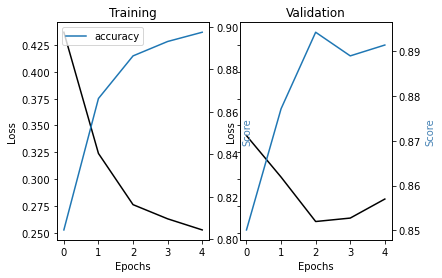

In [35]:
## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx() 
ax[0].plot(training.history['loss'], color='black') 
ax[0].set_xlabel('Epochs') 
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric) 
ax11.set_ylabel("Score", color='steelblue') 
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx() 
ax[1].plot(training.history['val_loss'], color='black') 
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
    ax22.plot(training.history['val_'+metric], label=metric) 
ax22.set_ylabel("Score", color="steelblue")
plt.show()

In [36]:
predicted_prob = model.predict(X_test) 
#predicted_prob 

In [37]:
dic_y_mapping = {0:0, 1:1} 
predicted = [dic_y_mapping[argmax(pred)] for pred in predicted_prob] 

In [38]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, predicted) 
# auc = metrics.roc_auc_score(y_test, predicted_prob[:,1])  # only for binary classification
print("Accuracy:", round(accuracy,2))
# print("Auc:", round(auc,2))
print("Detail:") 
print(metrics.classification_report(y_test, predicted))
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

Accuracy: 0.88
Detail:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      8098
           1       0.93      0.87      0.90     13246

    accuracy                           0.88     21344
   macro avg       0.87      0.88      0.87     21344
weighted avg       0.88      0.88      0.88     21344

[[ 7275   823]
 [ 1770 11476]]
